**Employee Performance Prediction**

**Problem Statement.**

Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance.

**Objectives.**

Importing necessary Modules

Import the modules necessary for Data Manipulation and Visualization.
Reading dataset

Read the dataset containing loan applicant information.

Task 1 - Exploring the Dataset

Understand the Structure and various data types of the attributes within the dataset.

Task 2 - Cleaning the dataset

Identify and analyze missing values in the dataset.

Task 3 - EDA Analysis

Conduct EDA to explore the visualisations of individual variables.

**Exploring the DataSet**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import warnings

warnings.filterwarnings('ignore')

In [15]:
file = ('/content/drive/MyDrive/Colab Notebooks/TeachForIndia/Test_data.csv')
df = pd.read_csv(file)


In [16]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [17]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [18]:
df.shape

(23490, 13)

In [19]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [21]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


**Data Cleaning**

In [22]:
#Testing the null value count
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [23]:
#Finding the most common value
print(df["education"].mode())
print(df["previous_year_rating"].mode())

0    Bachelor's
Name: education, dtype: object
0    3.0
Name: previous_year_rating, dtype: float64


In [24]:
#Finding Unique Values
df.nunique()

,0
employee_id,23490
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,9
age,41
previous_year_rating,5
length_of_service,34


In [25]:
df = df.drop('employee_id', axis=1)

In [26]:
#Testing for any Duplicate Values
df.duplicated().sum()

np.int64(26)

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
# Checking the percentage of null values for columns

100*(df.isna().mean()).sort_values(ascending=False)

,0
previous_year_rating,7.658541
education,4.389703
region,0.000000
department,0.000000
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
length_of_service,0.000000
KPIs_met >80%,0.000000


In [30]:
# Education and Previous_year_rating have missing values to be imputed with mode and median

df['education'].fillna(df['education'].mode()[0], inplace=True)

In [31]:
df['previous_year_rating'].unique()

array([nan,  3.,  1.,  2.,  4.,  5.])

In [32]:
num_cols = ['previous_year_rating']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [33]:
print(df.isnull().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [34]:
#check for columns with one unique value, count and freq is same

df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,23464,23464,23464,23464,23464
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7304,5290,16589,16574,13064


In [35]:
# Encode: 'm' = 0, 'f' = 1
df['gender'] = df['gender'].map({'m': 0, 'f': 1})

# Output the cleaned and encoded data
print(df)

              department     region         education  gender  \
0             Technology  region_26        Bachelor's       0   
1                     HR   region_4        Bachelor's       1   
2      Sales & Marketing  region_13        Bachelor's       0   
3            Procurement   region_2        Bachelor's       1   
4                Finance  region_29        Bachelor's       0   
...                  ...        ...               ...     ...   
23485              Legal   region_2   Below Secondary       0   
23486         Technology  region_25        Bachelor's       0   
23487                 HR  region_16        Bachelor's       1   
23488        Procurement  region_31        Bachelor's       0   
23489         Technology  region_17  Master's & above       0   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   3.0   
1                   other                1   31                   3.0   


In [36]:
print(df['gender'].value_counts())
df['gender'].value_counts(normalize=True) * 100  # Percentage
imbalance_ratio = (df['gender'] == 0).sum() / (df['gender'] == 1).sum()
imbalance_ratio

gender
0    16574
1     6890
Name: count, dtype: int64


np.float64(2.4055152394775035)

**Exploratory Data Analysis**

**Univariate Analysis**

In [37]:
df[['gender', 'department', 'region', 'recruitment_channel']].value_counts()

gender  department         region     recruitment_channel
0       Sales & Marketing  region_2   other                  494
                                      sourcing               376
                           region_7   other                  267
1       Procurement        region_2   other                  251
0       Sales & Marketing  region_22  other                  244
                                                            ... 
1       Sales & Marketing  region_3   sourcing                 1
        HR                 region_4   sourcing                 1
        Analytics          region_13  other                    1
0       HR                 region_24  sourcing                 1
                                      other                    1
Name: count, Length: 953, dtype: int64

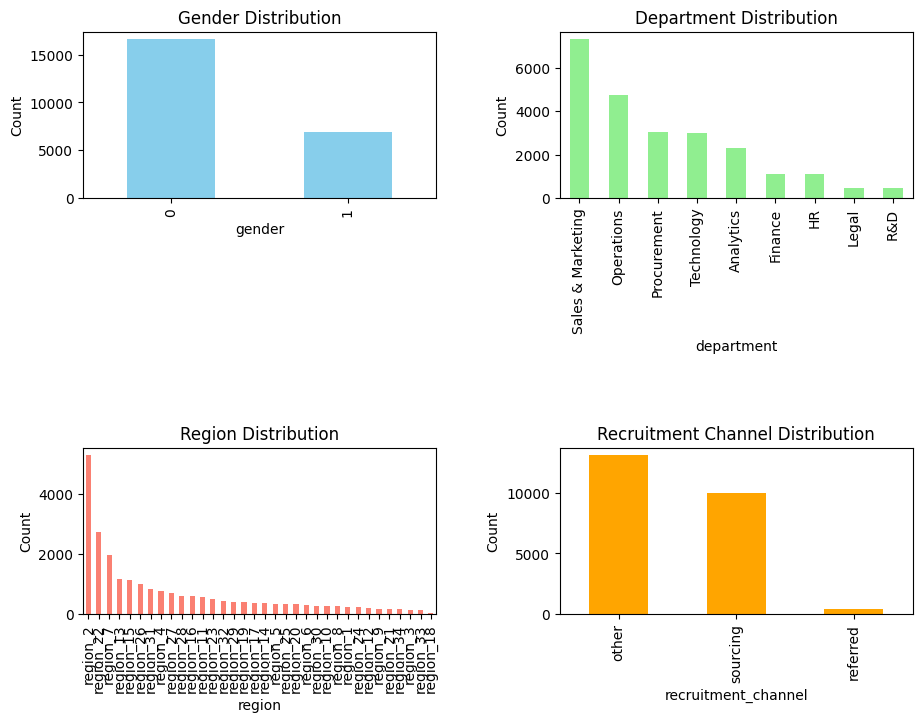

In [38]:
# Create a DataFrame
df1 = pd.DataFrame(df)

# List of columns to plot and their titles
columns = ['gender', 'department', 'region', 'recruitment_channel']
titles = ['Gender Distribution', 'Department Distribution',
          'Region Distribution', 'Recruitment Channel Distribution']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange']

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(columns):
    df1[col].value_counts().plot.bar(ax=axes[i], color=colors[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout(pad=3.5)
plt.subplots_adjust(hspace=1.5)
plt.show()

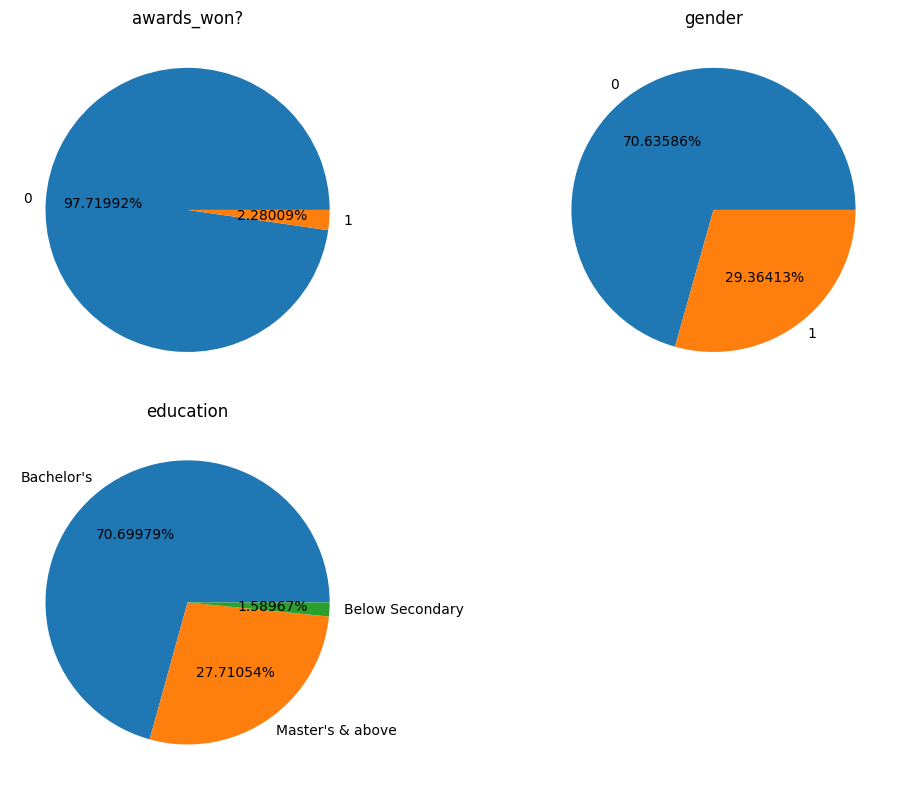

In [39]:
# Pie plots for columns
columns_plotting = ['awards_won?', 'gender', 'education']

# Determine subplot grid size
charts_number = len(columns_plotting)
cols = 2
rows = (charts_number + cols - 1) // cols

# Create subplots with exact number of axes
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))

# Flatten axes only if more than 1 subplot, else keep as list
if charts_number == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Create each pie chart
for i, column in enumerate(columns_plotting):
    counts = df[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.5f%%', startangle=0)
    axes[i].set_title(column)

# Remove extra axes (if any were created due to rounding up)
for ax in axes[charts_number:]:
    ax.remove()

plt.tight_layout()
plt.show()

In [40]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

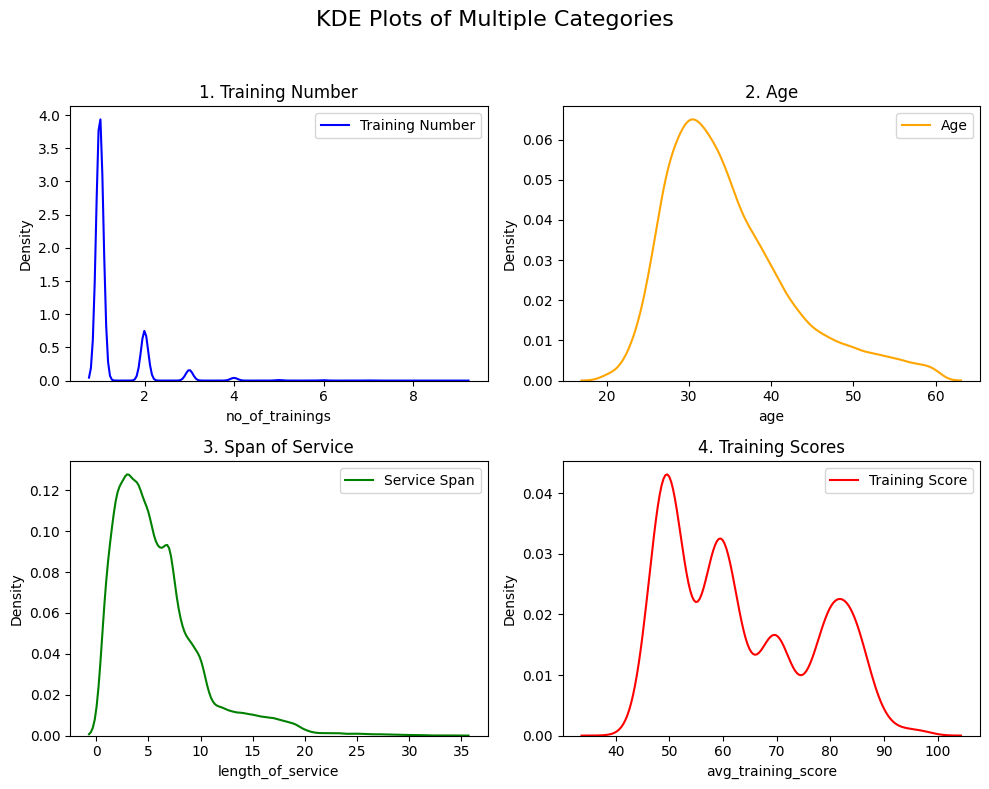

In [41]:
# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Titles for each subplot
# Plot KDE for each category in its respective subplot
sns.kdeplot(df['no_of_trainings'], ax=axes[0, 0], color='blue', label='Training Number')
axes[0, 0].set_title('1. Training Number')
axes[0, 0].legend()

sns.kdeplot(df['age'], ax=axes[0, 1], color='orange', label='Age')
axes[0, 1].set_title('2. Age')
axes[0, 1].legend()

sns.kdeplot(df['length_of_service'], ax=axes[1, 0], color='green', label='Service Span')
axes[1, 0].set_title('3. Span of Service')
axes[1, 0].legend()

sns.kdeplot(df['avg_training_score'], ax=axes[1, 1], color='red', label='Training Score')
axes[1, 1].set_title('4. Training Scores')
axes[1, 1].legend()

# Adjust spacing and add overall title
fig.suptitle('KDE Plots of Multiple Categories', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

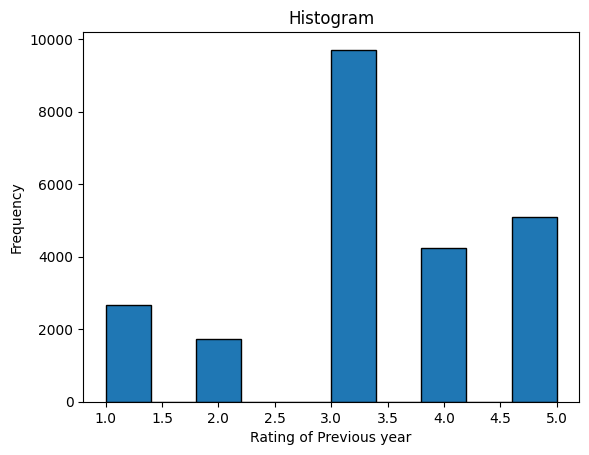

In [42]:
# Plotting the histogram for previous year rating
plt.hist(df['previous_year_rating'], bins=10, edgecolor='black')  # bins specify the number of intervals
plt.title('Histogram')
plt.xlabel('Rating of Previous year')
plt.ylabel('Frequency')

# Show the plot
plt.show()

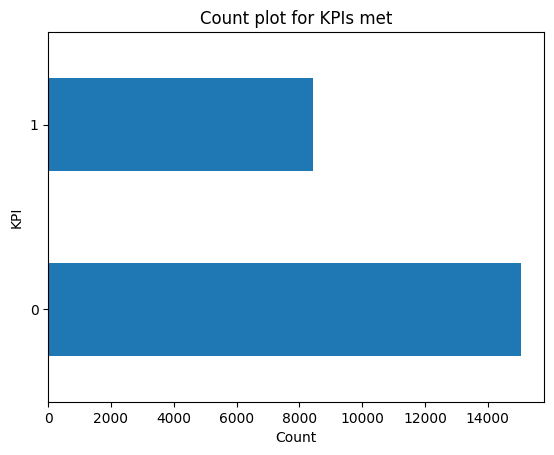

In [43]:
#Count plot for the KPI.
df['KPIs_met >80%'].value_counts().plot(kind = 'barh')

# Add label for the x-axis
plt.xlabel('Count')
# Add label for the y-axis
plt.ylabel('KPI')
plt.title('Count plot for KPIs met')  # Add a title
plt.show()

**Bivariate Analysis**

In [44]:
df[['gender', 'avg_training_score']].head()

,gender,avg_training_score
0,0,77
1,1,51
2,0,47
3,1,65
4,0,61


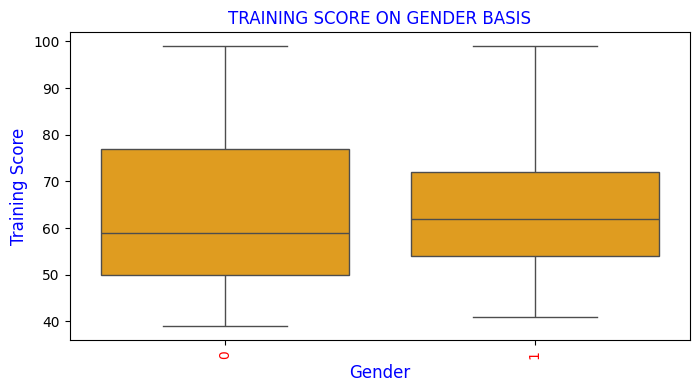

In [45]:
# Training Score as per Gender
plt.figure(figsize=(8, 4))
sns.boxplot(data = df[['gender', 'avg_training_score']], x = 'gender', y = 'avg_training_score', color = 'orange')
plt.title('Training Score on Gender basis'.upper(), color = 'b', fontsize = 12)
plt.xlabel('Gender', fontsize = 12, color = 'b')
plt.ylabel('Training Score', fontsize = 12, color = 'b')
plt.xticks(rotation = 90, color = 'r')
plt.show()

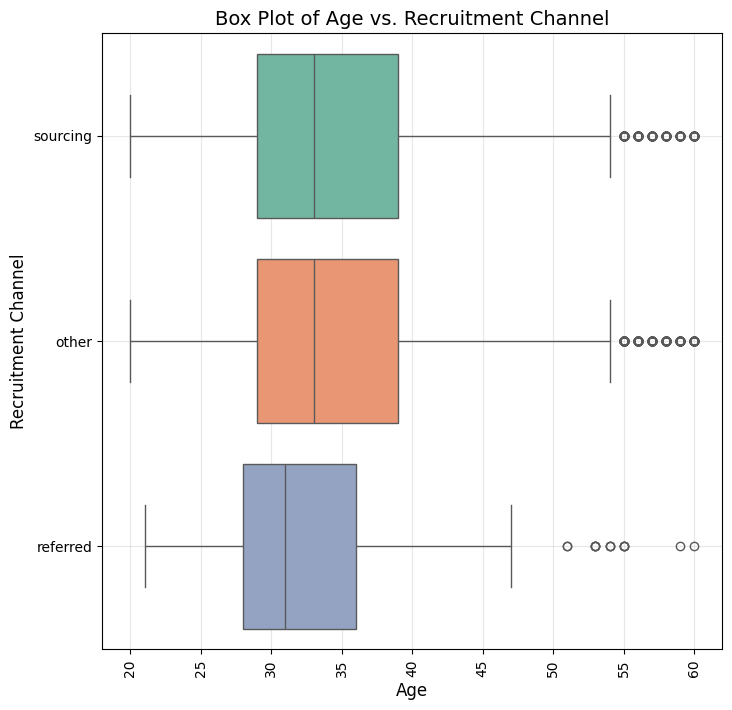

In [46]:
# Create the Box plot
plt.figure(figsize=(8, 8))
X = df['recruitment_channel']
Y= df['age']

sns.boxplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    legend = False)


# Customizing the plot
plt.title('Box Plot of Age vs. Recruitment Channel', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Recruitment Channel', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

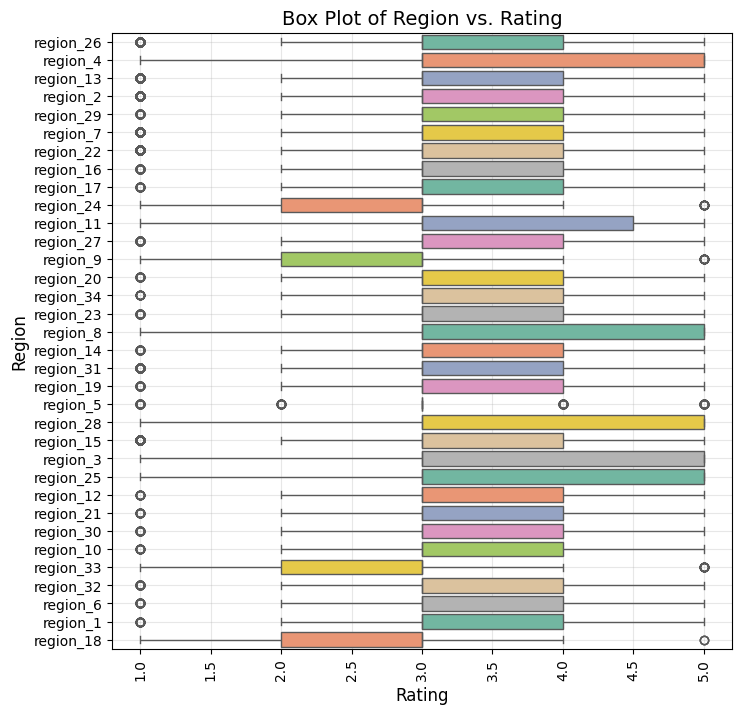

In [47]:
# Create the Box plot of ratings as per region
plt.figure(figsize=(8, 8))
X = df['region']
Y= df['previous_year_rating']

sns.boxplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    legend = False)


# Customizing the plot
plt.title('Box Plot of Region vs. Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Region', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

In [48]:
df['department'].unique()
df['department'].value_counts()

,count
department,
Sales & Marketing,7304
Operations,4760
Procurement,3018
Technology,3010
Analytics,2312
Finance,1091
HR,1084
Legal,445
R&D,440


In [49]:
df[['department', 'avg_training_score']].value_counts().head()

department         avg_training_score
Sales & Marketing  50                    1066
                   49                    1000
                   48                     938
                   51                     875
                   47                     693
Name: count, dtype: int64

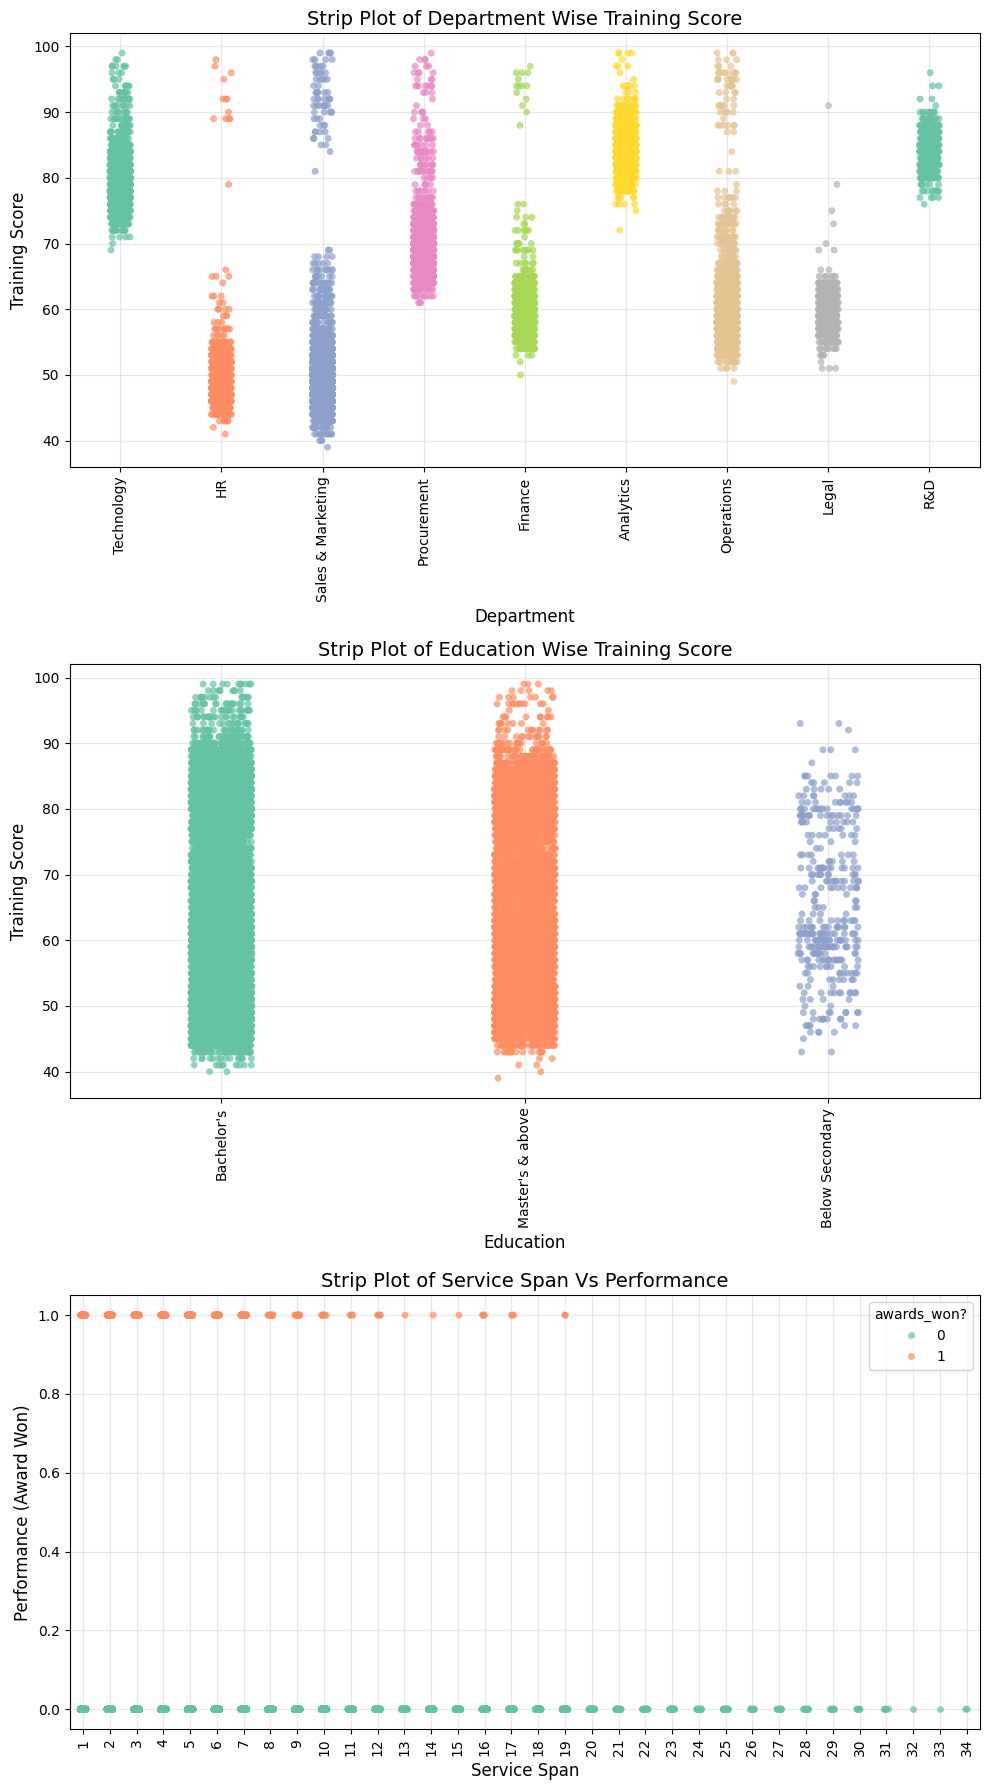

In [50]:
#Plotting Strip Plots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column

# Plot 1: Department vs Training Score
sns.stripplot(
    data=df,
    x='department',
    y='avg_training_score',
    hue='department',
    palette='Set2',
    alpha=0.7,
    ax=axes[0])

axes[0].set_title('Strip Plot of Department Wise Training Score', fontsize=14)
axes[0].set_xlabel('Department', fontsize=12)
axes[0].set_ylabel('Training Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.3)


# Plot 2: Education vs Training Score
sns.stripplot(
    data=df,
    x='education',
    y='avg_training_score',
    hue='education',
    palette='Set2',
    alpha=0.7,
    ax=axes[1])

axes[1].set_title('Strip Plot of Education Wise Training Score', fontsize=14)
axes[1].set_xlabel('Education', fontsize=12)
axes[1].set_ylabel('Training Score', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(alpha=0.3)


# Plot 3: Length of Service vs Awards Won
sns.stripplot(
    data=df,
    x='length_of_service',
    y='awards_won?',
    hue='awards_won?',
    palette='Set2',
    alpha=0.7,
    ax=axes[2])

axes[2].set_title('Strip Plot of Service Span Vs Performance', fontsize=14)
axes[2].set_xlabel('Service Span', fontsize=12)
axes[2].set_ylabel('Performance (Award Won)', fontsize=12)
axes[2].tick_params(axis='x', rotation=90)
axes[2].grid(alpha=0.3)


plt.tight_layout()
plt.show()

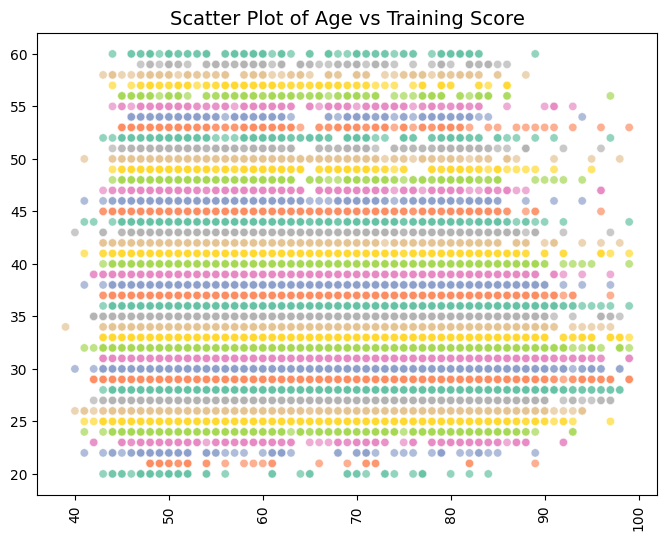

In [51]:
# Create the scatter plot
X = df['age']
Y= df['avg_training_score']
plt.figure(figsize=(8, 6), alpha = 0.7)
sns.scatterplot(x=Y,
    y=X,
    hue = X,
    palette='Set2',
    alpha=0.7, legend = False)


# Customizing the plot
plt.title('Scatter Plot of Age vs Training Score', fontsize=14)
plt.xlabel('', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('', fontsize=12)


plt.show()

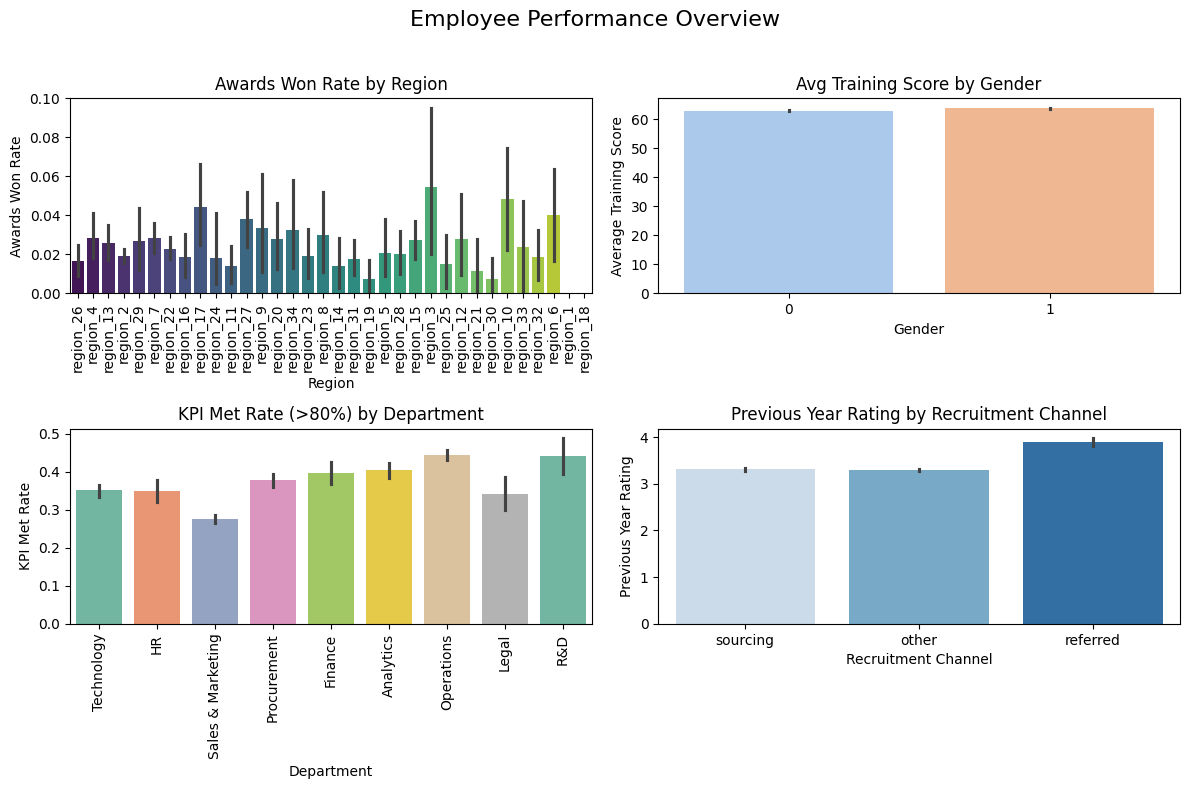

In [52]:
#Bar Plots for different columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=100)  # 2 rows, 2 columns
fig.suptitle('Employee Performance Overview', fontsize=16)

# 1. Region vs Awards Won
sns.barplot(data=df, x='region', y='awards_won?', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Awards Won Rate by Region')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Awards Won Rate')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Gender vs Avg Training Score
sns.barplot(data=df, x='gender', y='avg_training_score', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Avg Training Score by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Average Training Score')

# 3. Department vs KPI Met Rate
sns.barplot(data=df, x='department', y='KPIs_met >80%', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('KPI Met Rate (>80%) by Department')
axes[1, 0].set_xlabel('Department')
axes[1, 0].set_ylabel('KPI Met Rate')
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. Recruitment Channel vs Previous Year Rating
sns.barplot(data=df, x='recruitment_channel', y='previous_year_rating', palette='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Previous Year Rating by Recruitment Channel')
axes[1, 1].set_xlabel('Recruitment Channel')
axes[1, 1].set_ylabel('Previous Year Rating')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

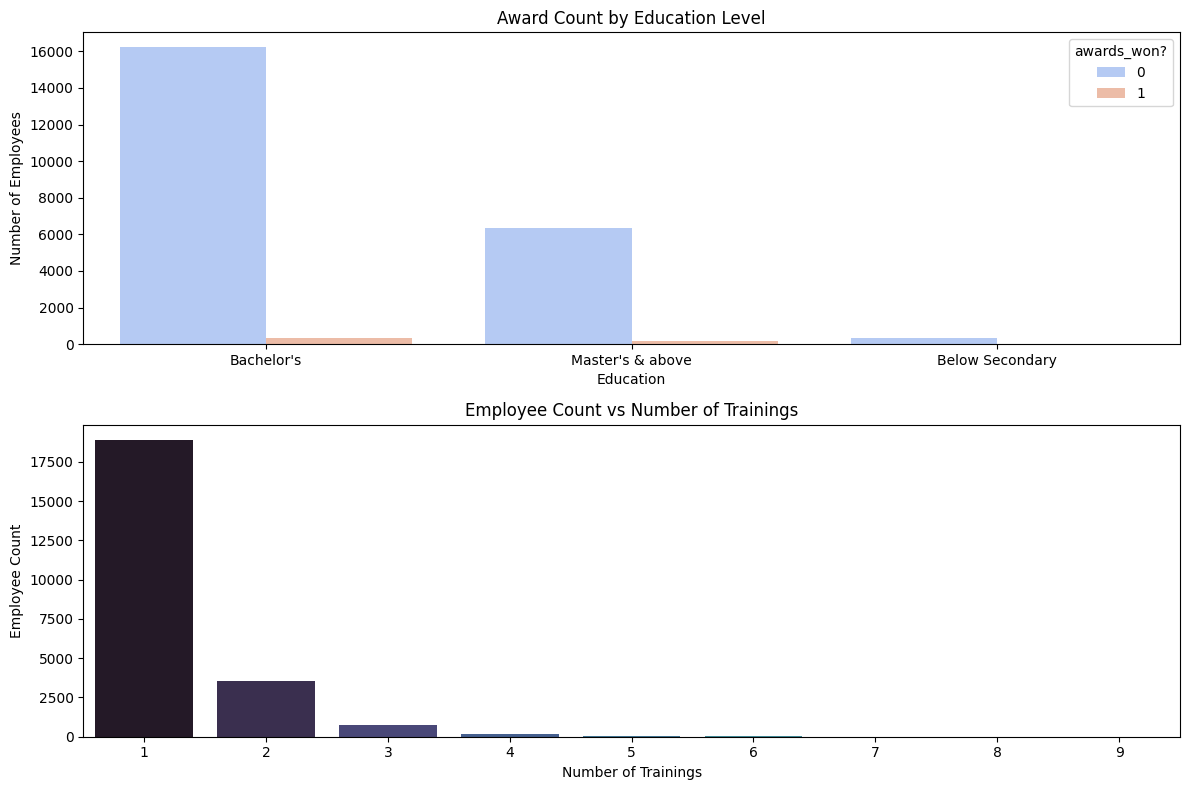

In [53]:
#Plotting of Count Plots
# Create 1 row with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(12,8))  # Width and height in inches

# --- Subplot 1: Education vs Awards Won ---
sns.countplot(data=df, x='education', hue='awards_won?', palette='coolwarm', ax=axes[0])
axes[0].set_title('Award Count by Education Level')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Number of Employees')
axes[0].tick_params(axis='x', rotation=0)

# --- Subplot 2: No. of Trainings ---
sns.countplot(data=df, x='no_of_trainings', palette='mako', ax=axes[1])
axes[1].set_title('Employee Count vs Number of Trainings')
axes[1].set_xlabel('Number of Trainings')
axes[1].set_ylabel('Employee Count')

# Final layout adjustment
plt.tight_layout()
plt.show()

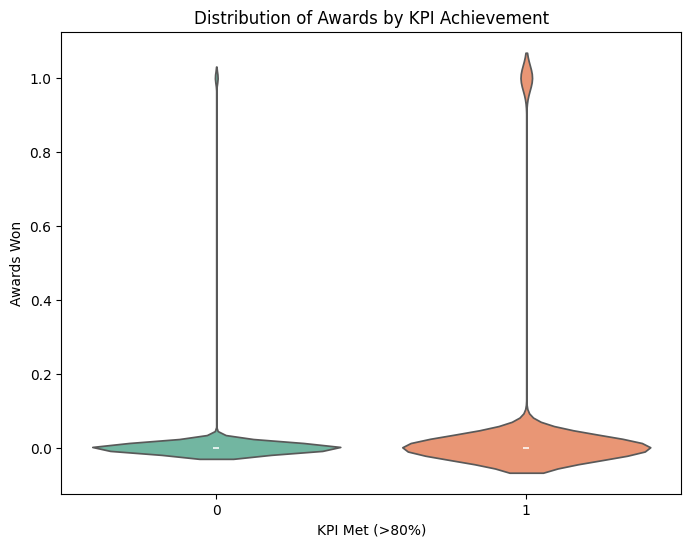

In [54]:
# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='KPIs_met >80%',
    y='awards_won?',
    data=df,
    inner='box',
    palette='Set2'
)

plt.title('Distribution of Awards by KPI Achievement')
plt.xlabel('KPI Met (>80%)')
plt.ylabel('Awards Won')
plt.show()

**Multivariate Analysis**

In [55]:
df.select_dtypes(include=['int64','float64']).columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

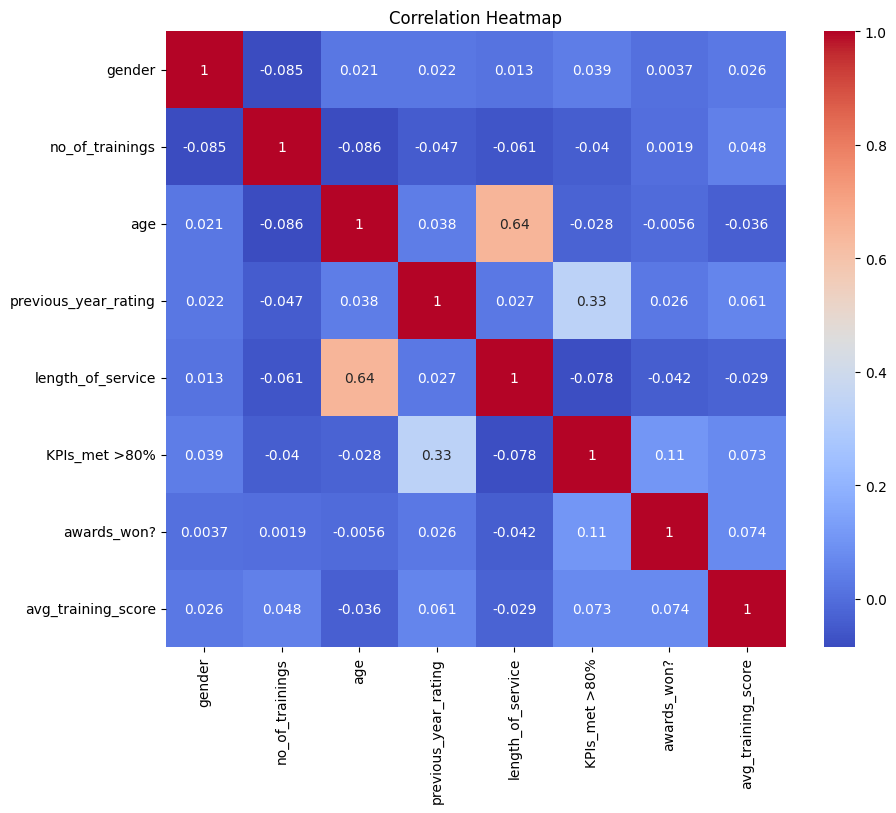

In [56]:
#Heat Map plotting
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

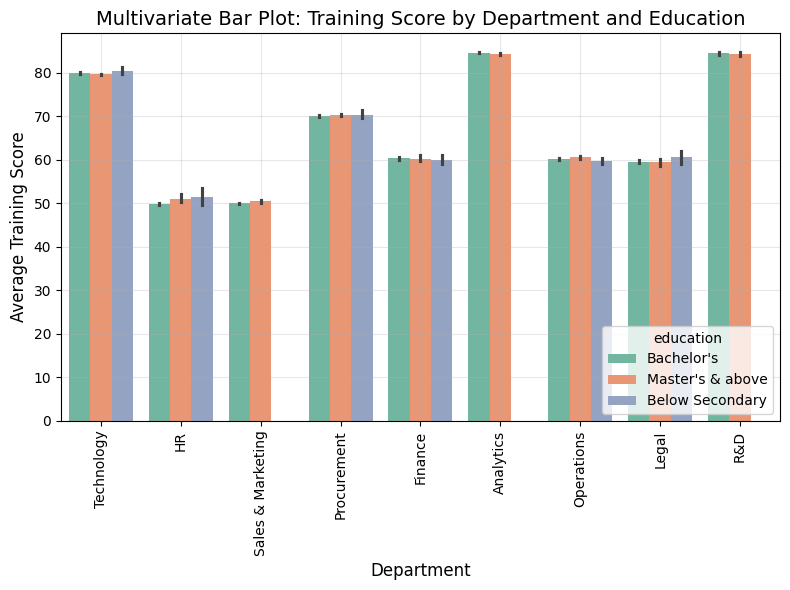

In [57]:
#Stacked Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='department',
    y='avg_training_score',
    hue='education',  # Second categorical variable
    palette='Set2'
)

plt.title('Multivariate Bar Plot: Training Score by Department and Education', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Training Score', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

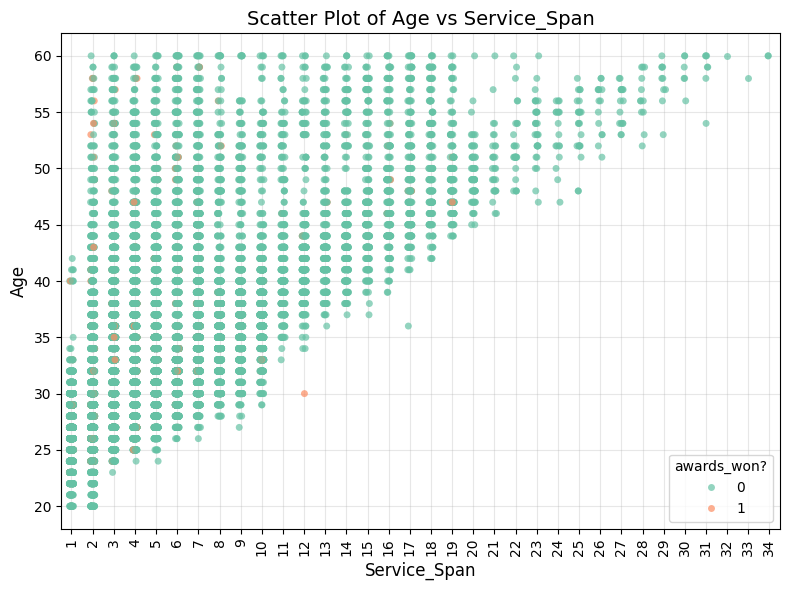

In [58]:
#Scatter Plot
plt.figure(figsize=(8, 6))
sns.stripplot(
    data=df,
    x='length_of_service',
    y='age',
    hue='awards_won?',
    palette='Set2',
    alpha=0.7) # To better distinguish overlapping points


# Customizing the plot
plt.title('Scatter Plot of Age vs Service_Span', fontsize=14)
plt.xlabel('Service_Span', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Age', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

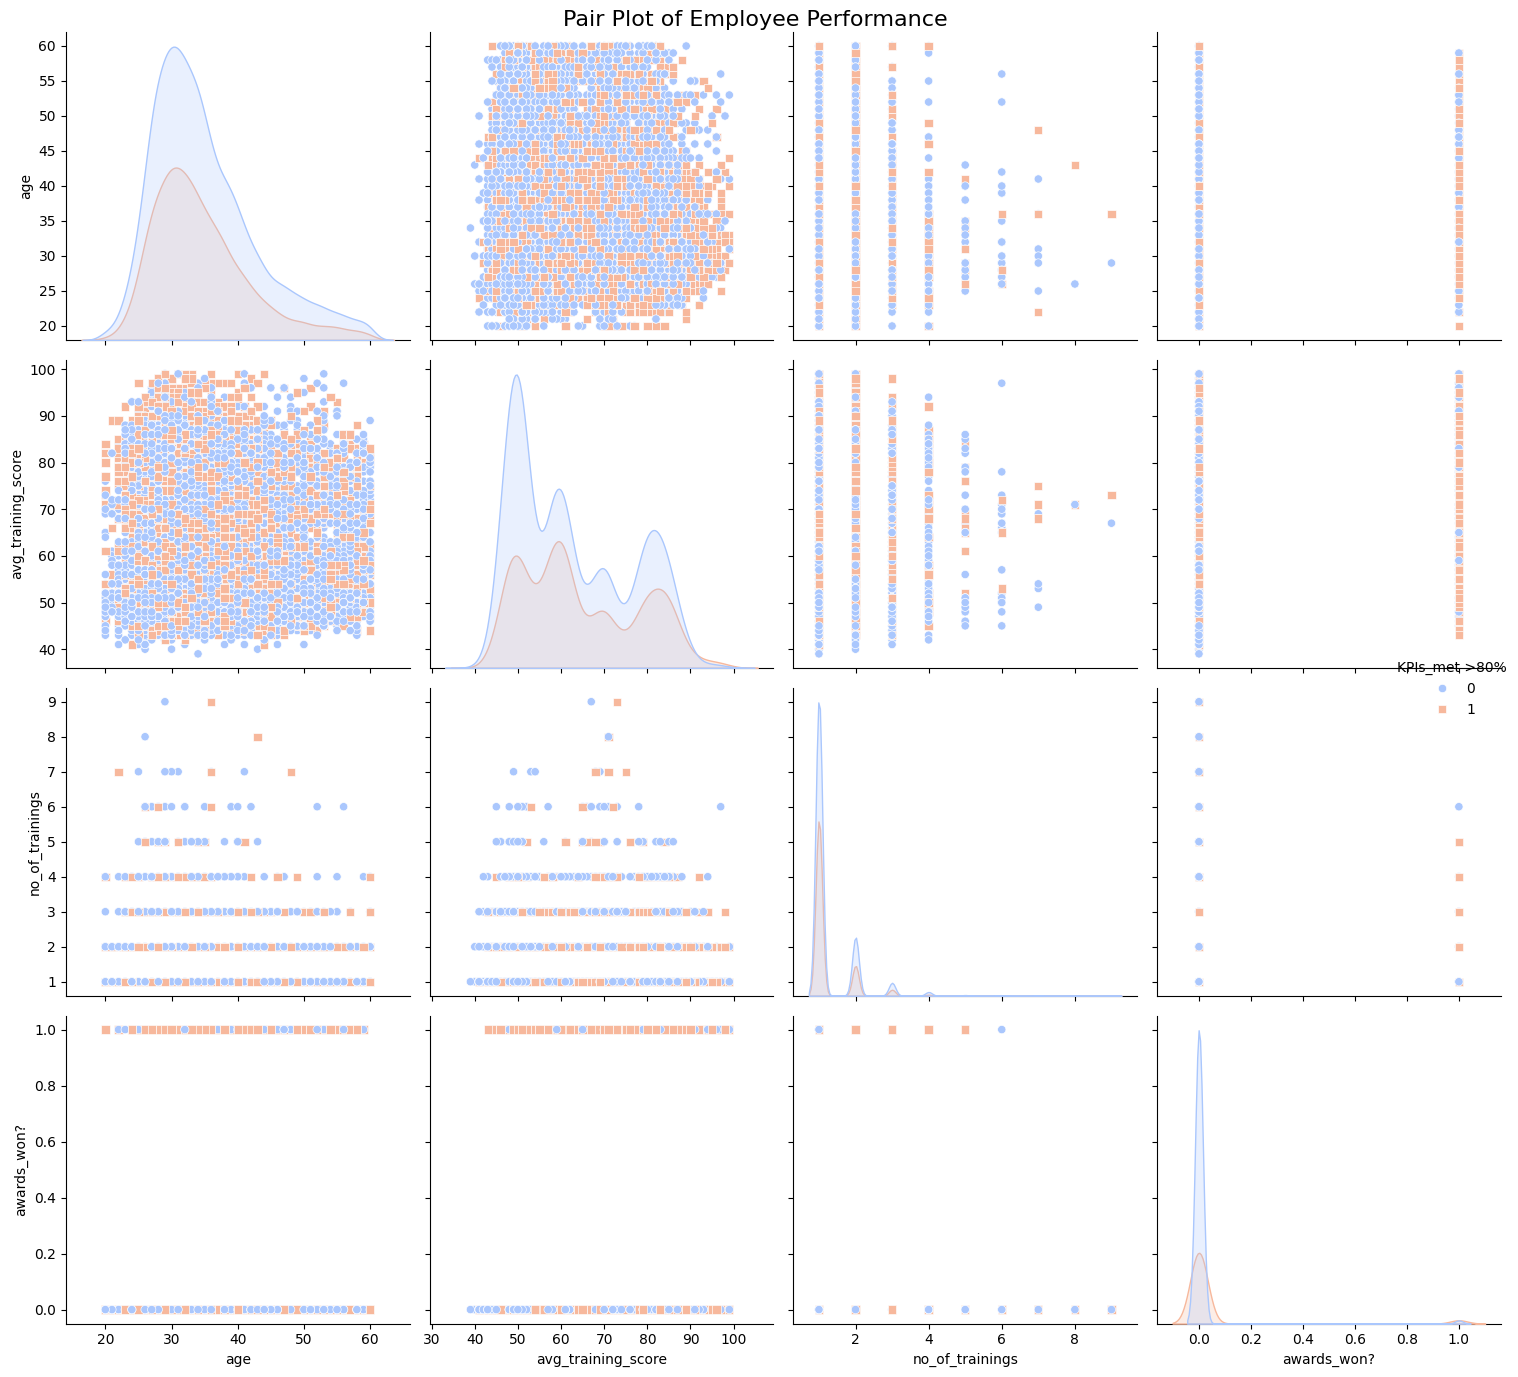

In [59]:
#Pair Plots
pair_plot_data = df[['age', 'avg_training_score', 'no_of_trainings', 'KPIs_met >80%', 'awards_won?']]

# Create the pair plot
sns.pairplot(pair_plot_data, hue='KPIs_met >80%', palette='coolwarm', markers=["o", "s"], height=3.5)

# Display the plot
plt.suptitle('Pair Plot of Employee Performance', fontsize=16)
plt.tight_layout()
plt.show()

**Problem Statement.**

Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance.
Objectives.

Importing necessary Modules

*Task 1* - **Data Scaling**

Scaling data and plotting the dataset to see the variation with original.

*Task 2* - **ML model with XGBoost, CatBoost, LightBGM**

Performing ML model with different Binary classification methods.

*Task 3* - **Best Scaling Function and Best model for your dataset**.

Running the models using scaled data and analysing the results.

In [60]:
!pip install xgboost lightgbm catboost --quiet

**Installing the required Libraries**

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix,auc, classification_report,recall_score, f1_score, precision_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

**DATA SCALING**

In [62]:
#Defining the scalers for the dataset

def scale_dataset(df, scaler_name, target_columns):
    scaler_dict = {
        'robust': RobustScaler(),
        'standard': StandardScaler(),
        'minmax': MinMaxScaler(),
        'maxabs': MaxAbsScaler()
    }
#Defining scalers
    scaler = scaler_dict.get(scaler_name.lower())
    if scaler is None:
        raise ValueError(f"Scaler '{scaler_name}' not recognized. Use 'robust', 'standard', 'minmax', or 'maxabs'.")

    features = df.drop(columns=target_columns)
    targets = df[target_columns]

    numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = features.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

    scaled_numeric = scaler.fit_transform(features[numeric_cols])
    scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols, index=features.index)

    final_df = pd.concat([scaled_numeric_df, features[categorical_cols], targets], axis=1)
    return final_df

In [63]:
# Plotting of the scaled data
def plot_separate_for_scalers_and_columns(original_data, scaled_data_dict, columns):
    """
    Plot original and scaled data for each scaler AND each column separately.
    Saves separate image per (scaler, column) pair.
    """
    for scaler_name, scaled_df in scaled_data_dict.items():
        for column in columns:
            plt.figure(figsize=(10, 5))
            plt.hist(original_data[column], bins=30, alpha=0.4, label='Original')
            plt.hist(scaled_df[column], bins=30, alpha=0.4, label=f'Scaled ({scaler_name})')
            plt.title(f'{column} — Original vs {scaler_name.capitalize()} Scaled')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.legend()
            plt.tight_layout()
            plt.show()

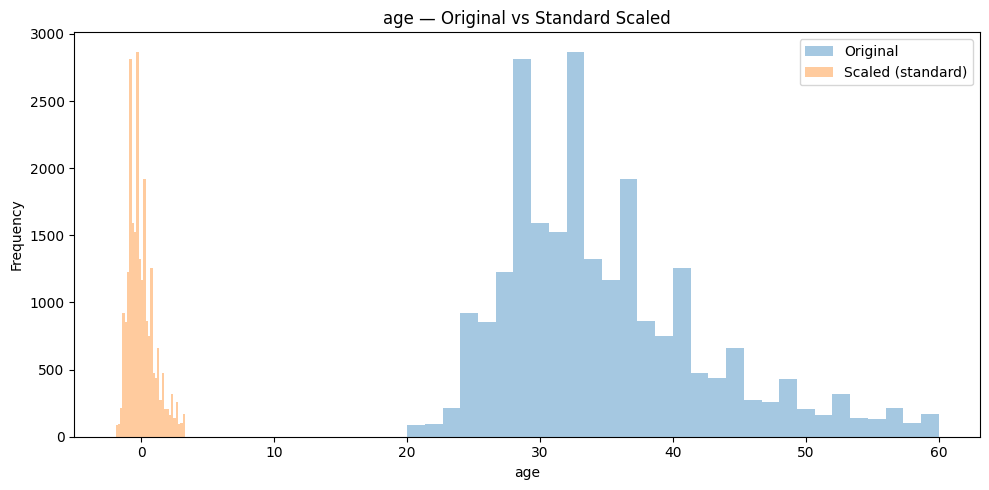

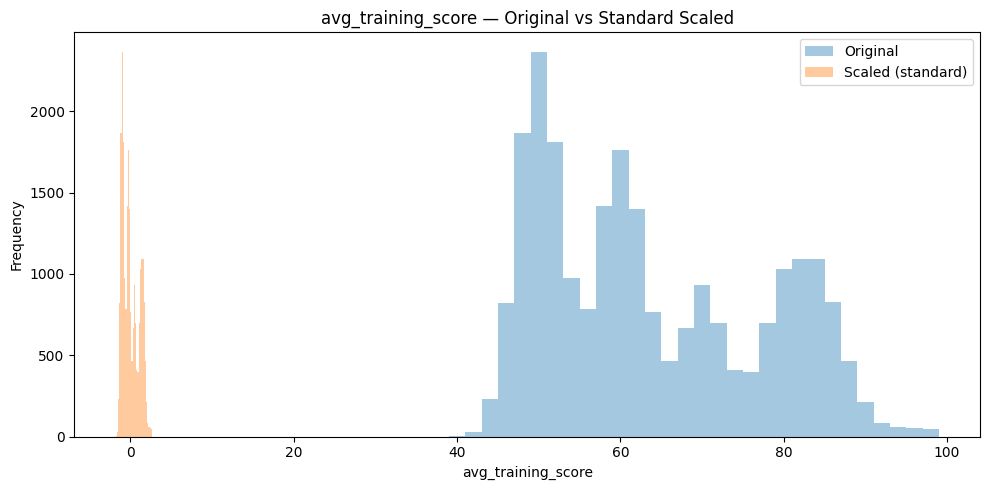

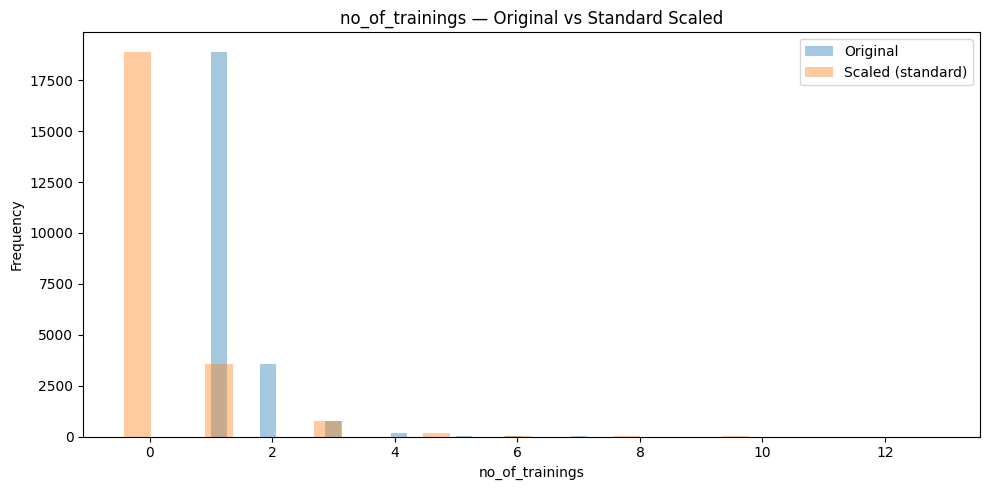

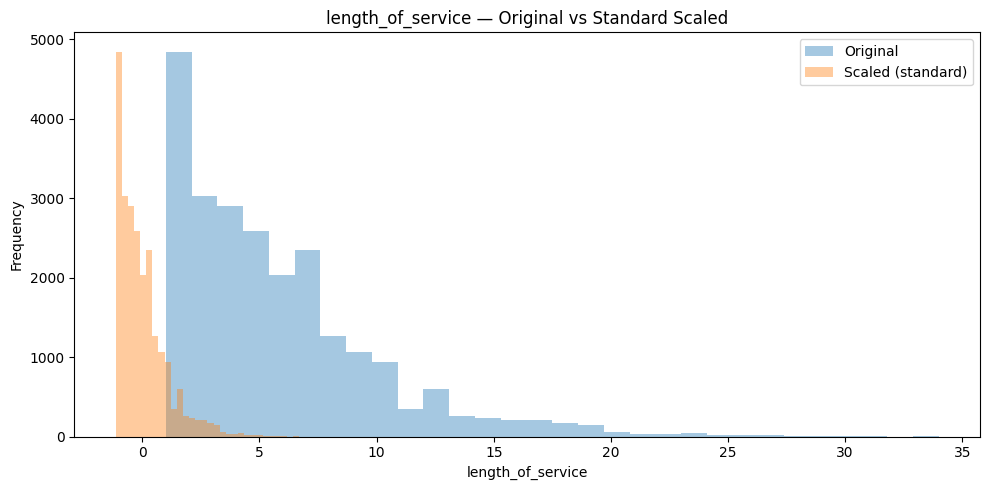

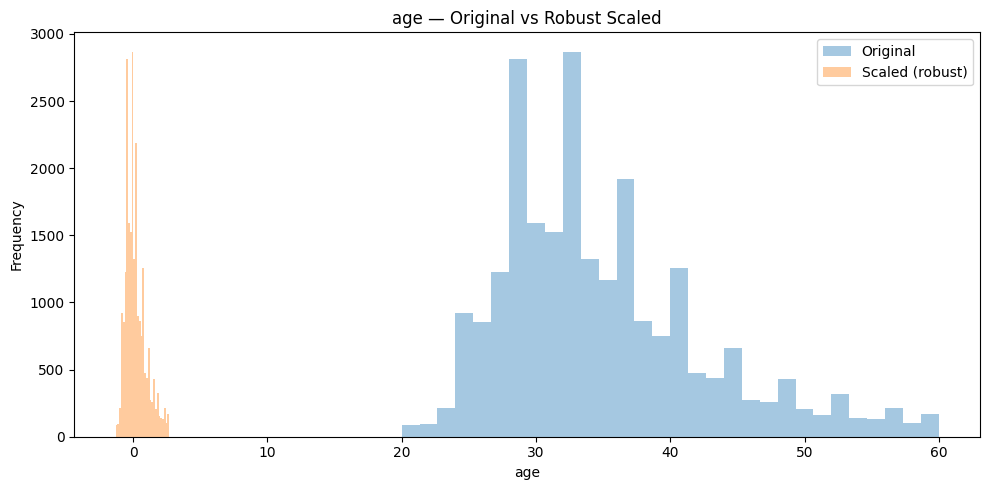

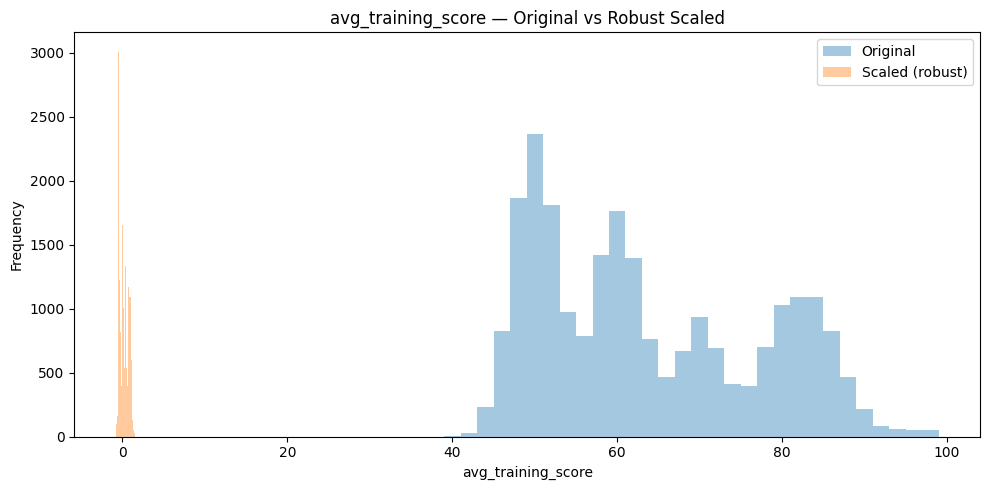

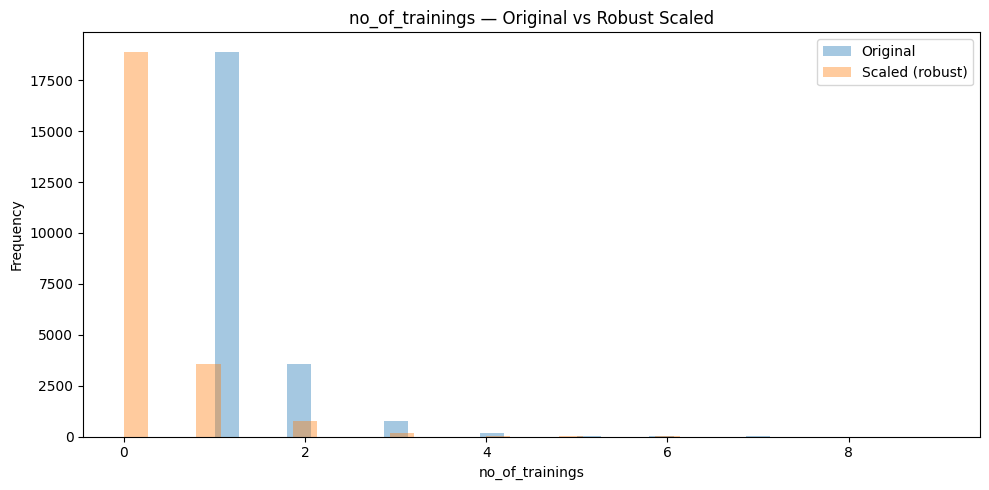

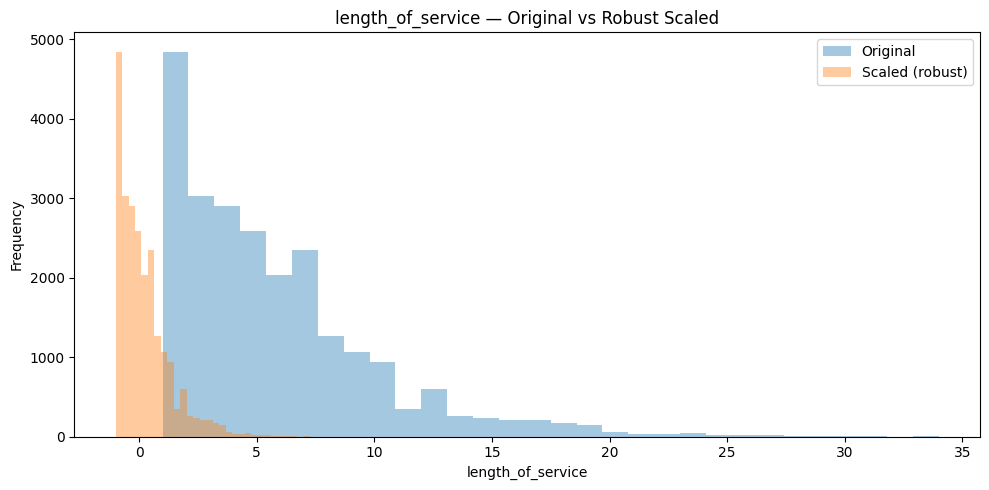

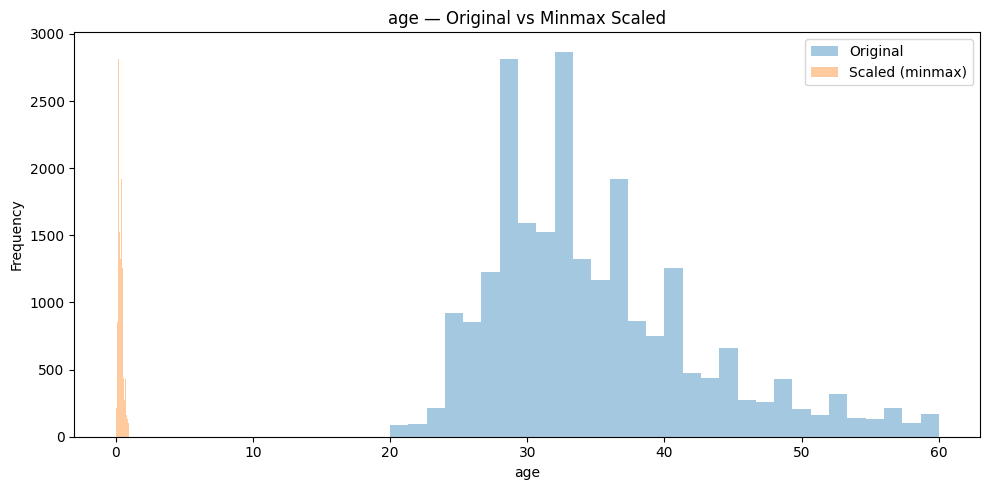

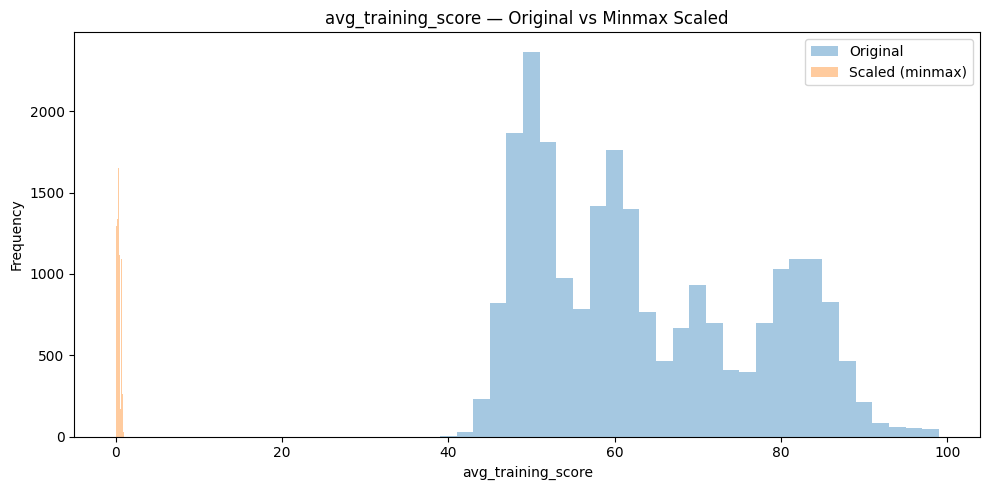

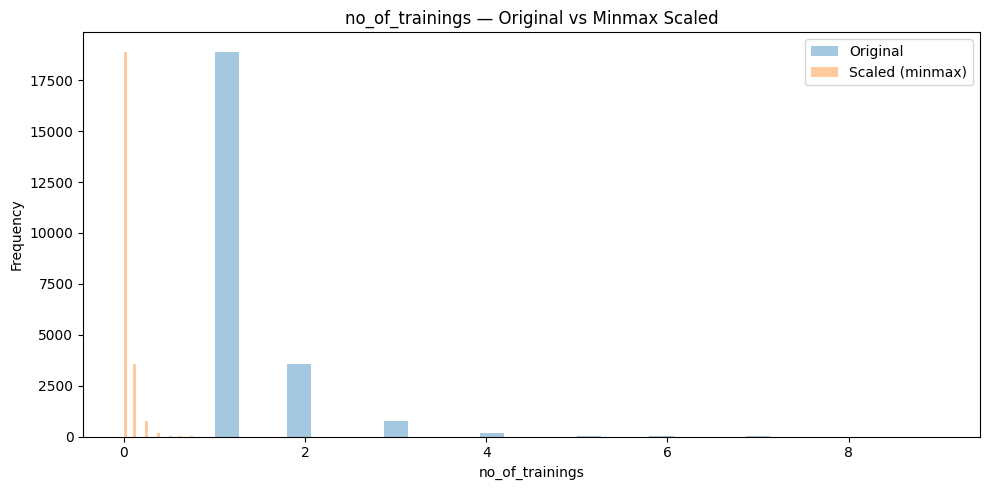

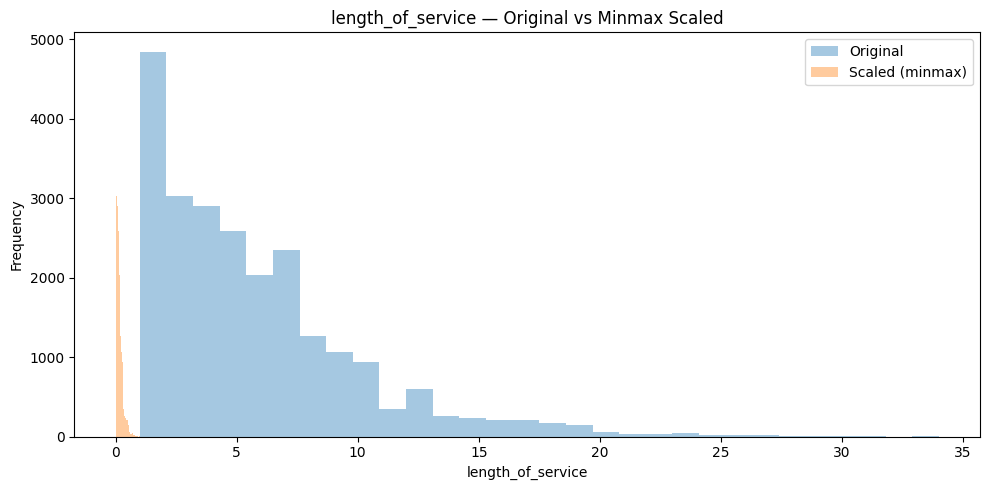

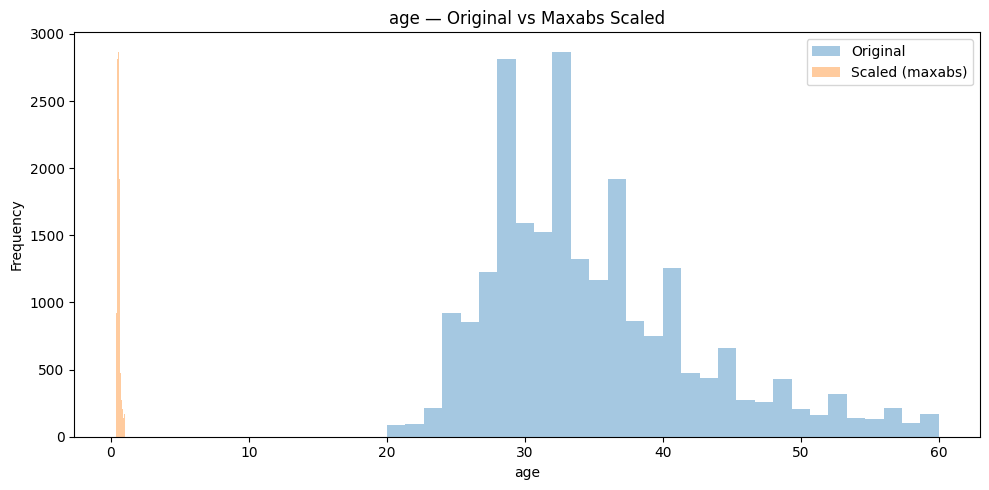

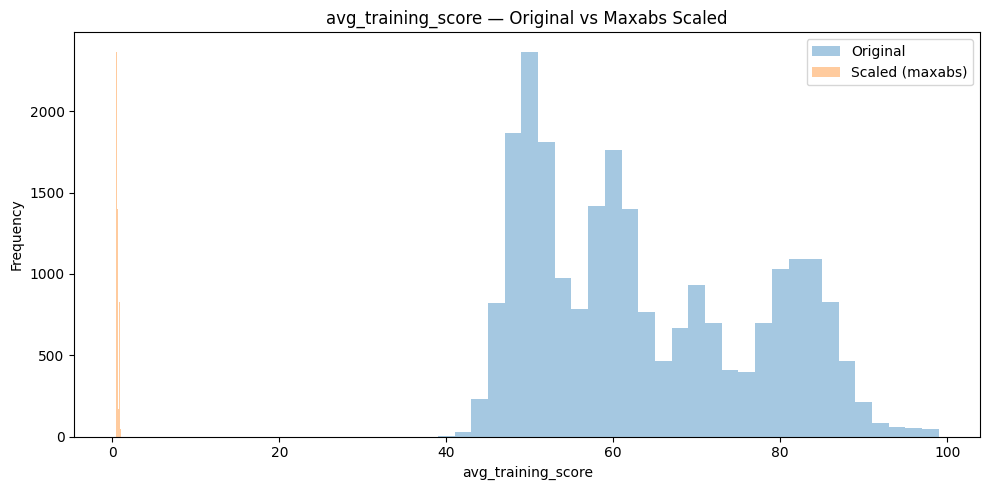

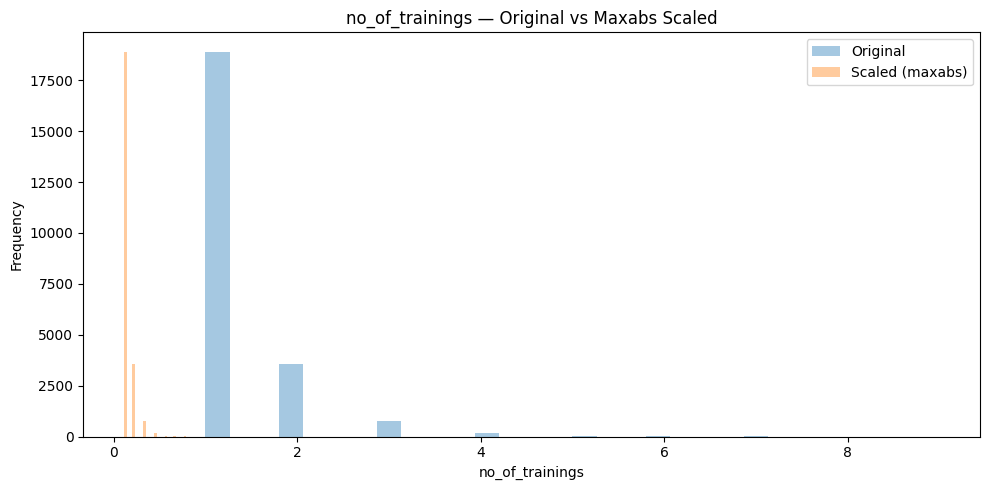

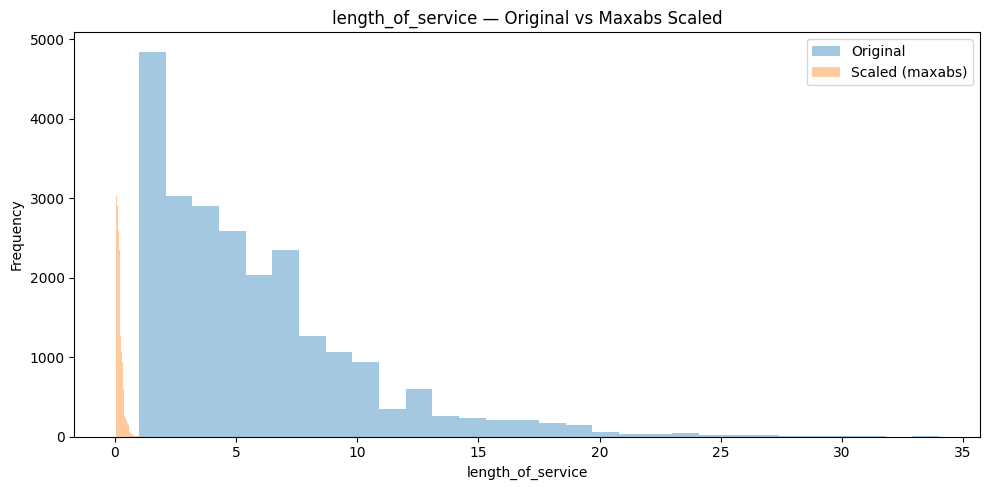

In [64]:
# Define scalers
scalers = ['standard', 'robust', 'minmax', 'maxabs']
target_cols = ['KPIs_met >80%', 'previous_year_rating']

# Scale data
scaled_datasets = {scaler: scale_dataset(df, scaler, target_cols) for scaler in scalers}

# Columns to visualize
columns = ['age', 'avg_training_score', 'no_of_trainings', 'length_of_service']

# Plot and save
plot_separate_for_scalers_and_columns(df, scaled_datasets, columns)

***The original data has been scaled as per the requirement using the scalers like Standard, Robust, MinMax, MaxAbs. We can see that the original data that gets spread is being converged by scaling the data.***

**ML models**

***Model 1(Logistic Regression)***

In [65]:
# Features
X_data = df[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Binary target
y_data = df["KPIs_met >80%"].apply(lambda x: 1 if x == 1 else 0)

# Encode categoricals
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.564
AUC: 0.582
Recall: 0.531
Precision: 0.414
F1 Score: 0.465

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.58      0.63      3019
           1       0.41      0.53      0.47      1674

    accuracy                           0.56      4693
   macro avg       0.55      0.56      0.55      4693
weighted avg       0.59      0.56      0.57      4693

Confusion Matrix:
 [[1759 1260]
 [ 785  889]]


***Model 2(XGBoost)***

In [66]:
# Features
X_data = df[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Binary target
y_data = df["previous_year_rating"].apply(lambda x: 1 if x > 3 else 0)

# Encode categoricals
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.603
AUC: 0.621
Recall: 0.327
Precision: 0.517
F1 Score: 0.401

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      2790
           1       0.52      0.33      0.40      1903

    accuracy                           0.60      4693
   macro avg       0.58      0.56      0.55      4693
weighted avg       0.59      0.60      0.58      4693

Confusion Matrix:
 [[2210  580]
 [1281  622]]


***Model 2 (ROC Curve)***

In [67]:
from sklearn.metrics import auc
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.3f}")

ROC AUC: 0.621


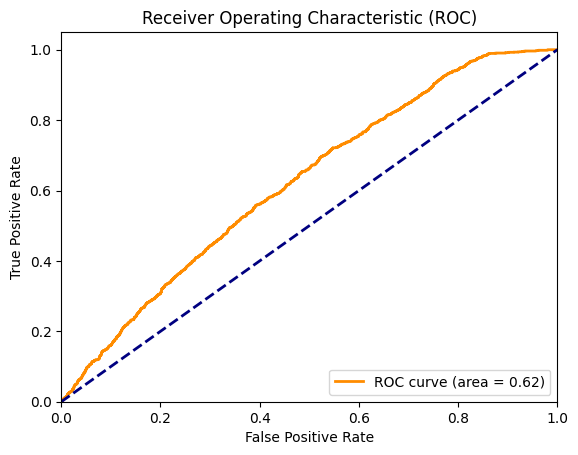

In [68]:
#ROc plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [69]:
# Print the feature importances
print("Feature Importances:")
for name, importance in zip(X_train.columns, xgb_model.feature_importances_):
    print(f"{name}: {importance:.4f}")

Feature Importances:
department: 0.1874
education: 0.0886
age: 0.0797
gender: 0.0989
recruitment_channel: 0.1127
avg_training_score: 0.0840
length_of_service: 0.2644
awards_won?: 0.0843


In [71]:
#Performance evaluation
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categoricals
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Scale features
scaler = StandardScaler()
X_test_data_scaled = scaler.fit_transform(X_encoded)

# Fit XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_test_data_scaled, y_data)

# Predict probabilities
df["previous_year_ratings"] = xgb_model.predict_proba(X_test_data_scaled)[:, 1]

# Summary
print("Predicted purchase probability - Summary (Performance of Employee):")
display(df["previous_year_ratings"].describe())

above_half = (df["previous_year_ratings"] > 0.3).mean() * 100
print(f"\nPercentage of performance of individuals with previous_year_rating >0.3: {above_half:.2f}%")

Predicted purchase probability - Summary (Performance of Employee):


,previous_year_ratings
count,23464.000000
mean,0.398162
std,0.166354
min,0.002607
25%,0.321865
50%,0.403414
75%,0.502047
max,0.974981



Percentage of performance of individuals with previous_year_rating >0.3: 79.37%


***Model 3(CatBoost)***

In [72]:
# Features
X_data = df[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Binary target
y_data = df["previous_year_rating"].apply(lambda x: 1 if x > 3 else 0)

# Encode categoricals
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CatBoost
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train_scaled, y_train)

y_pred = cat_model.predict(X_test_scaled)
y_proba = cat_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.606
AUC: 0.630
Recall: 0.301
Precision: 0.525
F1 Score: 0.383

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.81      0.71      2790
           1       0.53      0.30      0.38      1903

    accuracy                           0.61      4693
   macro avg       0.58      0.56      0.55      4693
weighted avg       0.59      0.61      0.58      4693

Confusion Matrix:
 [[2272  518]
 [1330  573]]


***Model 3 (ROC Curve)***

In [73]:
from sklearn.metrics import auc
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.3f}")

ROC AUC: 0.630


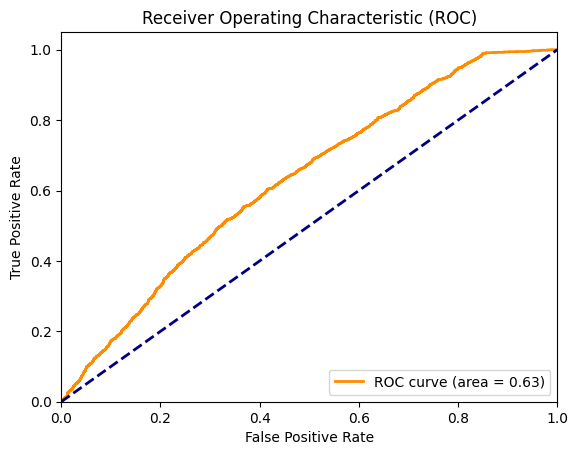

In [74]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [75]:
# Print the feature importances
importances = cat_model.get_feature_importance()
feature_names = X_encoded.columns

# Print
print("Feature Importances (CatBoost):")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

Feature Importances (CatBoost):
department: 11.2048
education: 3.9654
age: 13.6075
gender: 4.2884
recruitment_channel: 5.4211
avg_training_score: 14.9697
length_of_service: 45.0728
awards_won?: 1.4704


In [76]:
#Performance Evaluation
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categoricals (if you don't want CatBoost to handle them automatically)
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Fit CatBoost model
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_encoded, y_data)

# Predict probabilities
df["previous_year_ratings"] = cat_model.predict_proba(X_encoded)[:, 1]

# Summary
print("Predicted purchase probability - Summary (Performance of Employee):")
display(df["previous_year_ratings"].describe())

above_half = (df["previous_year_ratings"] > 0.3).mean() * 100
print(f"\nPercentage of performance of individuals with previous_year_rating > 0.3: {above_half:.2f}%")

Predicted purchase probability - Summary (Performance of Employee):


,previous_year_ratings
count,23464.000000
mean,0.398109
std,0.149503
min,0.004878
25%,0.342204
50%,0.400382
75%,0.498812
max,0.967869



Percentage of performance of individuals with previous_year_rating > 0.3: 85.34%


***Model 4(LightGBM)***

In [77]:
# Features
X_data = df[[
    "department", "education", "age", "gender", "recruitment_channel",
    "avg_training_score", "length_of_service", "awards_won?"
]]

# Binary target
y_data = df["previous_year_rating"].apply(lambda x: 1 if x > 3 else 0)

# Encode categoricals
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_scaled, y_train)

y_pred = lgbm_model.predict(X_test_scaled)
y_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 7439, number of negative: 11332
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 18771, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.396303 -> initscore=-0.420894
[LightGBM] [Info] Start training from score -0.420894
Accuracy: 0.604
AUC: 0.627
Recall: 0.289
Precision: 0.522
F1 Score: 0.372

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.82      0.71      2790
           1       0.52      0.29      0.37      1903

    accuracy                           0.60      4693
   macro avg       0.58      0.55      0.54      4693
weighted avg       0.59      0.60      0.57      4693

Confusion Matrix:
 

***Model 4 (ROC Curve)***

In [78]:
from sklearn.metrics import auc
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc:.3f}")

ROC AUC: 0.627


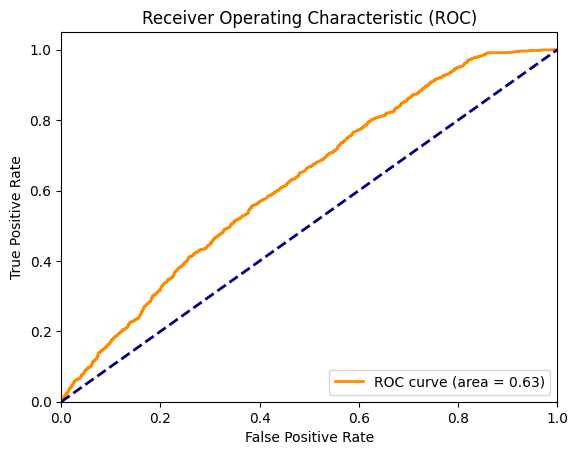

In [79]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [80]:
#Feature values
importances = lgbm_model.feature_importances_
feature_names = X_encoded.columns

print("Feature Importances (LightGBM):")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

Feature Importances (LightGBM):
department: 218.0000
education: 150.0000
age: 805.0000
gender: 139.0000
recruitment_channel: 203.0000
avg_training_score: 851.0000
length_of_service: 609.0000
awards_won?: 25.0000


In [81]:
# Performance Evaluation
X_encoded = X_data.copy()
categorical_cols = ["department", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Fit LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_encoded, y_data)

# Predict probabilities
df["previous_year_ratings"] = lgbm_model.predict_proba(X_encoded)[:, 1]

# Summary
print("Predicted purchase probability - Summary (Performance of Employee):")
display(df["previous_year_ratings"].describe())

# Percentage above threshold
above_half = (df["previous_year_ratings"] > 0.3).mean() * 100
print(f"\nPercentage of performance of individuals with previous_year_rating > 0.3: {above_half:.2f}%")

[LightGBM] [Info] Number of positive: 9342, number of negative: 14122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 23464, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398142 -> initscore=-0.413214
[LightGBM] [Info] Start training from score -0.413214
Predicted purchase probability - Summary (Performance of Employee):


,previous_year_ratings
count,23464.000000
mean,0.398162
std,0.141121
min,0.008459
25%,0.354821
50%,0.396162
75%,0.495371
max,0.868705



Percentage of performance of individuals with previous_year_rating > 0.3: 86.78%


***For balanced overall performance → Model 3 (best accuracy & AUC).***

***For catching more better performers → Model 1 (best recall & F1).***

***Best Model and Scaler Comparison***

**XGBoost**

In [82]:
# Initialize a list to hold the results
#BGBOOST RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    y_data = scaled_df["KPIs_met >80%"].apply(lambda x: 1 if x == 1 else 0)

    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'XGBoost',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

Best Results (Highest Accuracy):
     Scaler    Model  Accuracy   AUC-ROC  Precision    Recall  F1 Score  \
0  standard  XGBoost  0.647347  0.612026   0.514032  0.207885  0.296044   
1    robust  XGBoost  0.647347  0.612026   0.514032  0.207885  0.296044   
2    minmax  XGBoost  0.647347  0.612026   0.514032  0.207885  0.296044   
3    maxabs  XGBoost  0.647347  0.612026   0.514032  0.207885  0.296044   

             Confusion Matrix  
0  [[2690, 329], [1326, 348]]  
1  [[2690, 329], [1326, 348]]  
2  [[2690, 329], [1326, 348]]  
3  [[2690, 329], [1326, 348]]  

Best Scaler and Model Combination:
Scaler: standard
Model: XGBoost
Accuracy: 0.6473471127210739
Precision: 0.5140324963072378
Recall: 0.2078853046594982
F1 Score: 0.29604423649510847
AUC-ROC: 0.6120255704314728
Confusion Matrix for Best Model:
[[2690  329]
 [1326  348]]


**CatBoost**

In [83]:
# Initialize a list to hold the results
# RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    y_data = scaled_df["KPIs_met >80%"].apply(lambda x: 1 if x == 1 else 0)

    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

   # CatBoost
    cat_model = CatBoostClassifier(verbose=0)
    cat_model.fit(X_train_scaled, y_train)

    y_pred = cat_model.predict(X_test_scaled)
    y_proba = cat_model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'CatBoost',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

Best Results (Highest Accuracy):
     Scaler     Model  Accuracy   AUC-ROC  Precision    Recall  F1 Score  \
0  standard  CatBoost  0.655657  0.619727   0.561702  0.157706  0.246269   
1    robust  CatBoost  0.655657  0.619727   0.561702  0.157706  0.246269   
2    minmax  CatBoost  0.655657  0.619727   0.561702  0.157706  0.246269   
3    maxabs  CatBoost  0.655657  0.619727   0.561702  0.157706  0.246269   

             Confusion Matrix  
0  [[2813, 206], [1410, 264]]  
1  [[2813, 206], [1410, 264]]  
2  [[2813, 206], [1410, 264]]  
3  [[2813, 206], [1410, 264]]  

Best Scaler and Model Combination:
Scaler: standard
Model: CatBoost
Accuracy: 0.6556573620285532
Precision: 0.5617021276595745
Recall: 0.15770609318996415
F1 Score: 0.2462686567164179
AUC-ROC: 0.6197272906795392
Confusion Matrix for Best Model:
[[2813  206]
 [1410  264]]


**LightBGM**

In [84]:
# Initialize a list to hold the results
#BGBOOST RESULTS AND BEST PREDICTED
scaler_dict = {
    'robust': RobustScaler(),
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}
# Initialize a list to hold the results
results = []

# Loop through scalers
for scaler_name, scaled_df in scaled_datasets.items():
    # Prepare data
    X_data = scaled_df[[
        "department", "education", "age", "gender", "recruitment_channel",
        "avg_training_score", "length_of_service", "awards_won?"
    ]]
    y_data = scaled_df["KPIs_met >80%"].apply(lambda x: 1 if x == 1 else 0)

    # Encode categoricals
    X_encoded = X_data.copy()
    categorical_cols = ["department", "education", "gender", "recruitment_channel"]
    le = LabelEncoder()
    for col in categorical_cols:
        X_encoded[col] = le.fit_transform(X_encoded[col])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, test_size=0.2, random_state=42)

    # Scale features using the selected scaler
    scaler = scaler_dict[scaler_name.lower()]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    # LightGBM
    lgbm_model = LGBMClassifier()
    lgbm_model.fit(X_train_scaled, y_train)

    y_pred = lgbm_model.predict(X_test_scaled)
    y_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Scaler': scaler_name,
        'Model': 'LightGBM',
        'Accuracy': accuracy,
        'AUC-ROC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort by accuracy (or any other metric you prefer)
best_results = results_df.sort_values(by='Accuracy', ascending=False)

# Display the best results
print("Best Results (Highest Accuracy):")
print(best_results.head())

# Document the best scaler and model combination
best_scaler_model = best_results.iloc[0]
print("\nBest Scaler and Model Combination:")
print(f"Scaler: {best_scaler_model['Scaler']}")
print(f"Model: {best_scaler_model['Model']}")
print(f"Accuracy: {best_scaler_model['Accuracy']}")
print(f"Precision: {best_scaler_model['Precision']}")
print(f"Recall: {best_scaler_model['Recall']}")
print(f"F1 Score: {best_scaler_model['F1 Score']}")
print(f"AUC-ROC: {best_scaler_model['AUC-ROC']}")

# Optionally, you can visualize the confusion matrix for the best model
print(f"Confusion Matrix for Best Model:\n{best_scaler_model['Confusion Matrix']}")

[LightGBM] [Info] Number of positive: 6750, number of negative: 12021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 18771, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359597 -> initscore=-0.577113
[LightGBM] [Info] Start training from score -0.577113
[LightGBM] [Info] Number of positive: 6750, number of negative: 12021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 18771, number of used features: 8
[LightGBM] [Info] [binar

Among the three models, LightGBM with StandardScaler has the highest accuracy (65.26%), precision (55.4%), and AUC-ROC (0.624) according to the results, indicating that it better prevents false positives, which inadvertently reward underperforming performance. Its weaker recall, however, suggests that it might overlook some high performers.

All things considered, LightGBM is the ideal model if achieving accuracy and balanced performance is more important than capturing every high performer.

But if only finding High performers is the criteria then XGBoost is the ideal model.